In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
import numpy as np

In [15]:
def create_graph(V,E_pos,E_neg,w):
  G=nx.Graph()

  for v in V:
    G.add_node(v)

  for u,v in E_pos:
    G.add_edge(u,v,weight=w.get((u,v),1),color='g')

  for u,v in E_neg:
    G.add_edge(u,v,weight=w.get((u,v),1),color='r')

  return G

In [27]:
V=list(range(30))
E_pos = set()
E_neg = set()

for i in range(len(V)):
  for j in range(i+1,len(V)):
    if random.random()>0.5:
      if random.random()>0.5:
        E_pos.add((i,j))
      else:
        E_neg.add((i,j))

w={}
for u,v in E_pos:
  w[(u,v)]=random.uniform(0.5,1.5)
for u,v in E_neg:
  w[(u,v)] = random.uniform(0.5,1.5)

print('nodes',V)
print('E_pos',E_pos)
print('E_neg',E_neg)
print('weight',w)




nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
E_pos {(6, 18), (4, 9), (7, 26), (3, 13), (8, 9), (22, 26), (23, 25), (17, 21), (8, 18), (9, 17), (11, 14), (7, 10), (1, 24), (15, 23), (7, 19), (7, 28), (9, 19), (1, 8), (10, 20), (15, 25), (25, 27), (12, 20), (3, 17), (9, 12), (12, 29), (5, 23), (1, 19), (2, 27), (12, 13), (5, 7), (22, 23), (3, 19), (9, 14), (3, 28), (5, 25), (14, 28), (2, 20), (5, 9), (22, 25), (3, 21), (5, 18), (1, 14), (10, 26), (2, 22), (16, 21), (5, 11), (19, 22), (1, 16), (10, 28), (2, 24), (6, 15), (15, 27), (14, 25), (8, 15), (17, 27), (9, 23), (11, 29), (26, 29), (6, 26), (20, 25), (4, 8), (21, 24), (8, 17), (2, 10), (17, 29), (10, 23), (0, 22), (2, 28), (13, 25), (6, 28), (7, 27), (12, 23), (10, 16), (11, 15), (19, 28), (9, 27), (6, 12), (24, 27), (15, 24), (4, 12), (4, 21), (2, 5), (2, 14), (0, 26), (18, 22), (0, 1), (5, 15), (8, 14), (14, 27), (2, 7), (17, 26), (11, 19), (15, 19), (6, 16), 

In [28]:
G=create_graph(V,E_pos,E_neg,w)

In [29]:
pos = nx.spring_layout(G)

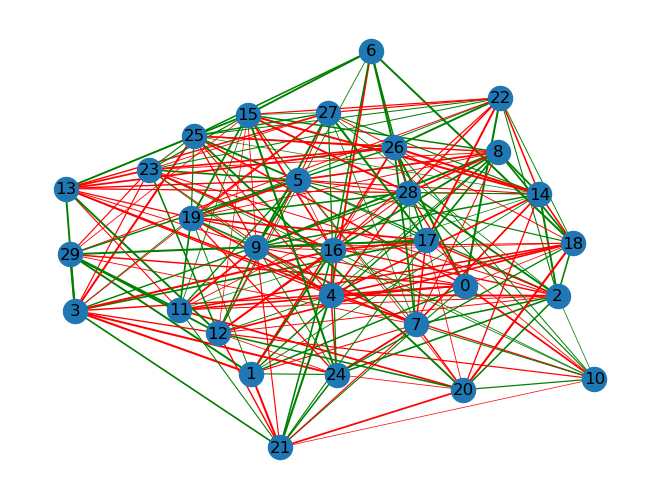

In [30]:
colors = [G[u][v]['color'] for u,v in G.edges()]
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G,pos,with_labels=True,edge_color=colors,width=weights)

In [37]:
A = nx.adjacency_matrix(G).todense()

In [41]:
kmeans = KMeans(n_clusters=4,n_init='auto')

In [42]:
clusters = kmeans.fit_predict(A)

In [43]:
for node,cluster in enumerate(clusters):
  print(f"Node {node} is in cluster {cluster}")

Node 0 is in cluster 3
Node 1 is in cluster 1
Node 2 is in cluster 0
Node 3 is in cluster 1
Node 4 is in cluster 2
Node 5 is in cluster 0
Node 6 is in cluster 1
Node 7 is in cluster 0
Node 8 is in cluster 0
Node 9 is in cluster 0
Node 10 is in cluster 1
Node 11 is in cluster 0
Node 12 is in cluster 2
Node 13 is in cluster 1
Node 14 is in cluster 3
Node 15 is in cluster 2
Node 16 is in cluster 1
Node 17 is in cluster 3
Node 18 is in cluster 3
Node 19 is in cluster 3
Node 20 is in cluster 0
Node 21 is in cluster 1
Node 22 is in cluster 1
Node 23 is in cluster 3
Node 24 is in cluster 3
Node 25 is in cluster 3
Node 26 is in cluster 0
Node 27 is in cluster 0
Node 28 is in cluster 3
Node 29 is in cluster 1


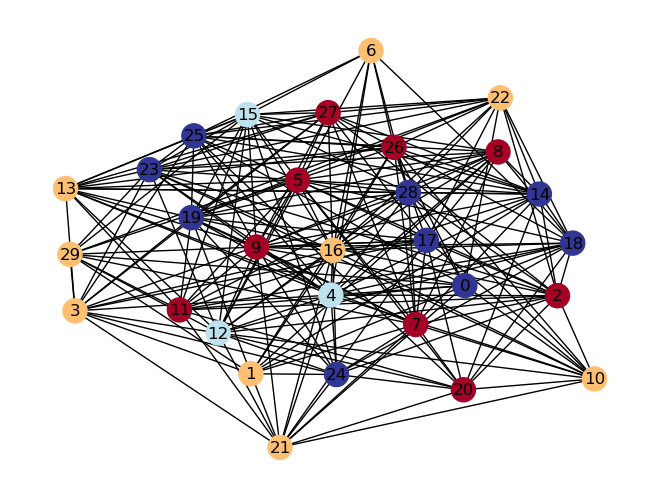

In [44]:
nx.draw(G,pos,with_labels=True,node_color =clusters, cmap=plt.cm.RdYlBu)